# Check contaminants and finalize phyloseq objects
* Do not run!  USED LIST GENERARTED TO PRUNE PHYLOSEQ OBJECTS AT END OF NOTEBOOK 5, DOUBLE CHECKED THAT NUMBERS DIDN'T CHANGE

In [1]:
library(dada2)
library(tidyr)
library(dplyr)
library(reshape2)
library(phyloseq)
library(gridExtra)
library(ggplot2)

Loading required package: Rcpp
Warning message:
“package ‘Rcpp’ was built under R version 3.6.1”Registered S3 method overwritten by 'dplyr':
  method               from  
  as.data.frame.tbl_df tibble
Warning message:
“multiple methods tables found for ‘lengths’”Warning message:
“multiple methods tables found for ‘rowSums’”Warning message:
“multiple methods tables found for ‘colSums’”Warning message:
“multiple methods tables found for ‘rowMeans’”Warning message:
“multiple methods tables found for ‘colMeans’”
Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Warning message:
“package ‘reshape2’ was built under R version 3.6.1”
Attaching package: ‘reshape2’

The following object is masked from ‘package:tidyr’:

    smiths

Warning message:
“package ‘phyloseq’ was built under R version 3.6.1”
Attaching package: ‘gridExtra’

The following object

# Exp 2

In [2]:
ps = readRDS(file = '~/Hyphosphere/Exp11/Exp11_phyloseq.rds')
ps

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 12983 taxa and 192 samples ]
sample_data() Sample Data:       [ 192 samples by 11 sample variables ]
tax_table()   Taxonomy Table:    [ 12983 taxa by 6 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 12983 tips and 12953 internal nodes ]

In [3]:
theme_pub = function (base_size = 11, base_family = "Arial") 
{
    theme_grey(base_size = base_size, base_family = base_family) %+replace% 
        theme(
            axis.line.x = element_line(size = .5),
            axis.line.y = element_line(size = .5),
            panel.background = element_rect(fill = "white", colour = NA), 
            panel.border = element_rect(fill = NA, color = "black", size = .5), 
            panel.grid.major = element_blank(), 
            panel.grid.minor = element_blank(), 
            strip.background = element_rect(fill = "grey85", 
                colour = "grey20"), 
            legend.key = element_rect(fill = "white", 
                colour = NA), complete = TRUE)
    }

Controls in Experiment 11

Plate 1
* SampleID Sample
* 89_125-BK	125-BK
* 90_29-BK	29-BK
* 91_77-BK	77-BK
* 92_PCRblank	PCRblank
* 93_PCRblank	PCRblank

PCR plate 2
* 187_139-BK; 139-BK
* 188_155-BK; 155-BK
* 189_187-BK; 187-BK
* 192_MockComm; MockComm





In [4]:
MC = subset_samples(ps, Sample == "MockComm")
MC = filter_taxa(MC, function(x) sum(x > 0) > 0, TRUE)
MC

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 11 taxa and 1 samples ]
sample_data() Sample Data:       [ 1 samples by 11 sample variables ]
tax_table()   Taxonomy Table:    [ 11 taxa by 6 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 11 tips and 10 internal nodes ]

In [5]:
MC %>% psmelt

Warning message in psmelt(.):
“The sample variables: 
Sample
 have been renamed to: 
sample_Sample
to avoid conflicts with special phyloseq plot attribute names.”

,OTU,Sample,Abundance,sample_Sample,Experiment,Plant,Fungus,Soil,SampleType,Treatment,TimePoint,DAI,Rep,Concentration_ng.ul,Kingdom,Phylum,Class,Order,Family,Genus
2,ASV120,192_MockComm,7702,MockComm,3,MockCom,,,MK,,NA,NA,NA,NA,Bacteria,Bacteroidetes,Bacteroidia,Cytophagales,Spirosomaceae,Dyadobacter
5,ASV183,192_MockComm,7426,MockComm,3,MockCom,,,MK,,NA,NA,NA,NA,Bacteria,Deinococcus-Thermus,Deinococci,Deinococcales,Deinococcaceae,Deinococcus
4,ASV173,192_MockComm,7391,MockComm,3,MockCom,,,MK,,NA,NA,NA,NA,Bacteria,Proteobacteria,Alphaproteobacteria,Sphingomonadales,Sphingomonadaceae,Sphingomonas
6,ASV231,192_MockComm,7196,MockComm,3,MockCom,,,MK,,NA,NA,NA,NA,Bacteria,Actinobacteria,Actinobacteria,Propionibacteriales,Nocardioidaceae,Aeromicrobium
7,ASV242,192_MockComm,6630,MockComm,3,MockCom,,,MK,,NA,NA,NA,NA,Bacteria,Firmicutes,Bacilli,Bacillales,Paenibacillaceae,Paenibacillus
11,ASV93,192_MockComm,6560,MockComm,3,MockCom,,,MK,,NA,NA,NA,NA,Bacteria,Proteobacteria,Gammaproteobacteria,Xanthomonadales,Xanthomonadaceae,Lysobacter
8,ASV275,192_MockComm,5929,MockComm,3,MockCom,,,MK,,NA,NA,NA,NA,Bacteria,Firmicutes,Bacilli,Bacillales,Bacillaceae,Bacillus
3,ASV131,192_MockComm,5561,MockComm,3,MockCom,,,MK,,NA,NA,NA,NA,Bacteria,Proteobacteria,Gammaproteobacteria,Pseudomonadales,Pseudomonadaceae,Pseudomonas
9,ASV34,192_MockComm,5547,MockComm,3,MockCom,,,MK,,NA,NA,NA,NA,Bacteria,Proteobacteria,Gammaproteobacteria,Betaproteobacteriales,Burkholderiaceae,Delftia
10,ASV7688,192_MockComm,8,MockComm,3,MockCom,,,MK,,NA,NA,NA,NA,Bacteria,Actinobacteria,Acidimicrobiia,Microtrichales,NA,NA


## Check PCR blanks

In [6]:
PB = subset_samples(ps, Sample == "PCRblank")
PB = filter_taxa(PB, function(x) sum(x > 0) > 0, TRUE)
PB

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 39 taxa and 2 samples ]
sample_data() Sample Data:       [ 2 samples by 11 sample variables ]
tax_table()   Taxonomy Table:    [ 39 taxa by 6 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 39 tips and 38 internal nodes ]

In [7]:
otu_table(PB) %>% t()

,92_PCRblank,93_PCRblank
ASV941,0,101
ASV3323,0,92
ASV818,0,66
ASV747,39,0
ASV4,0,67
ASV11,0,55
ASV4298,0,55
ASV2,322,111
ASV9233,0,89
ASV560,88,0


In [8]:
PBlist = taxa_names(PB)
PBlist

[1] "ASV941"   "ASV3323"  "ASV818"   "ASV747"   "ASV4"     "ASV11"   
 [7] "ASV4298"  "ASV2"     "ASV9233"  "ASV560"   "ASV3127"  "ASV8458" 
[13] "ASV312"   "ASV577"   "ASV1002"  "ASV575"   "ASV2925"  "ASV50"   
[19] "ASV4034"  "ASV5505"  "ASV15178" "ASV4564"  "ASV3312"  "ASV285"  
[25] "ASV5207"  "ASV524"   "ASV39"    "ASV91"    "ASV143"   "ASV288"  
[31] "ASV57"    "ASV526"   "ASV5699"  "ASV3210"  "ASV5519"  "ASV4200" 
[37] "ASV5554"  "ASV3679"  "ASV5009"

In [113]:
pdf('~/Hyphosphere/Exp11/PB_ContaminantCheck.pdf')    

for(cTax in PBlist){
    
    plot = filter(ps.m, OTU == cTax) %>%
    ggplot(., aes(x=interaction(Treatment,Rep), y= Abundance)) +
    geom_point()+
    facet_grid(Soil~SampleType, scales = 'free_x')+
    ggtitle(as.character(cTax))
    
    print(plot)
    
    }
dev.off()

png 
  2

* ASV2 is MRE, not contamination
* ASV 1002 is not correlated with DNA extract/biomass samples
*ASV 39 is possibly a contaminant, but not clear leave for now
ASV 143 possible contaminant, but not perfect correlation with biomass


In [127]:
tax_table(ps.norm)["ASV143",]

,Kingdom,Phylum,Class,Order,Family,Genus
ASV143,Bacteria,Proteobacteria,Gammaproteobacteria,Betaproteobacteriales,Burkholderiaceae,NA


In [130]:
ps.norm %>% prune_taxa('ASV143',.) %>% psmelt() %>% 
    group_by(SampleType, Soil) %>% 
    summarize(n = length(Abundance > 0),
             mAbund = mean(Abundance)) %>% arrange(desc(mAbund))
    

Warning message in prune_taxa(taxa, phy_tree(x)):
“prune_taxa attempted to reduce tree to 1 or fewer tips.
 tree replaced with NULL.”Warning message in psmelt(.):
“The sample variables: 
Sample
 have been renamed to: 
sample_Sample
to avoid conflicts with special phyloseq plot attribute names.”

SampleType,Soil,n,mAbund
PB,,2,4.893287e-02
CH,Florence,8,2.232233e-02
EB,,6,6.137548e-03
RH,Florence,4,6.012768e-03
RS,Florence,5,1.910522e-03
RS,,1,1.875938e-03
CS,Florence,8,1.670561e-03
BS,Florence,16,1.283781e-03
BH,Florence,16,1.255479e-03
RS,Dryden,5,7.351162e-04


In [128]:
df = ps.norm %>% prune_taxa('ASV143',.) %>% otu_table() %>% as.data.frame() %>% 
    mutate(sample = row.names(.)) %>% filter(ASV143 > 0) %>% arrange(desc(ASV143))
df

Warning message in prune_taxa(taxa, phy_tree(x)):
“prune_taxa attempted to reduce tree to 1 or fewer tips.
 tree replaced with NULL.”

ASV143,sample
0.0532544379,92_PCRblank
0.0470048288,163_GVFLHN3-CH
0.0461973658,70_GVFLHN2-CH
0.0446113074,93_PCRblank
0.0319477768,73_GVFLHP1-CH
0.0285839562,170_GVFLHP4-CH
0.0268118978,188_155-BK
0.0197547232,67_GVFLHN1-CH
0.0150406009,71_GVFLHN2-RH
0.0096993210,189_187-BK


## Check extraction blanks 

In [9]:
EB =  subset_samples(ps, SampleType == "EB")
EB = filter_taxa(EB, function(x) sum(x > 0) > 0, TRUE)
EB

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 195 taxa and 6 samples ]
sample_data() Sample Data:       [ 6 samples by 11 sample variables ]
tax_table()   Taxonomy Table:    [ 195 taxa by 6 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 195 tips and 194 internal nodes ]

In [10]:
otu_table(EB) %>% t()

,187_139-BK,188_155-BK,189_187-BK,89_125-BK,90_29-BK,91_77-BK
ASV540,0,0,0,0,44,0
ASV6874,0,0,34,0,0,0
ASV277,0,54,0,0,0,34
ASV2186,0,0,0,53,0,0
ASV1930,0,0,0,0,0,38
ASV5364,0,131,0,0,0,0
ASV6708,0,0,0,0,101,0
ASV5457,0,0,15,0,0,0
ASV993,0,0,0,0,47,0
ASV10605,0,0,0,0,53,0


In [11]:
sample_sums(EB)

187_139-BK 188_155-BK 189_187-BK  89_125-BK   90_29-BK   91_77-BK 
      2355       2387       3093       4045       3448       3184

In [23]:
EBlist = filter_taxa(EB, function(x) sum(x > 0) > 1, TRUE) %>% taxa_names()

In [24]:
length(EBlist)

[1] 48

In [25]:
ps.norm = transform_sample_counts(ps, function(x) x/sum(x))

In [32]:
tmp.p =  prune_taxa(EBlist, ps.norm) %>% psmelt()


Warning message in psmelt(.):
“The sample variables: 
Sample
 have been renamed to: 
sample_Sample
to avoid conflicts with special phyloseq plot attribute names.”

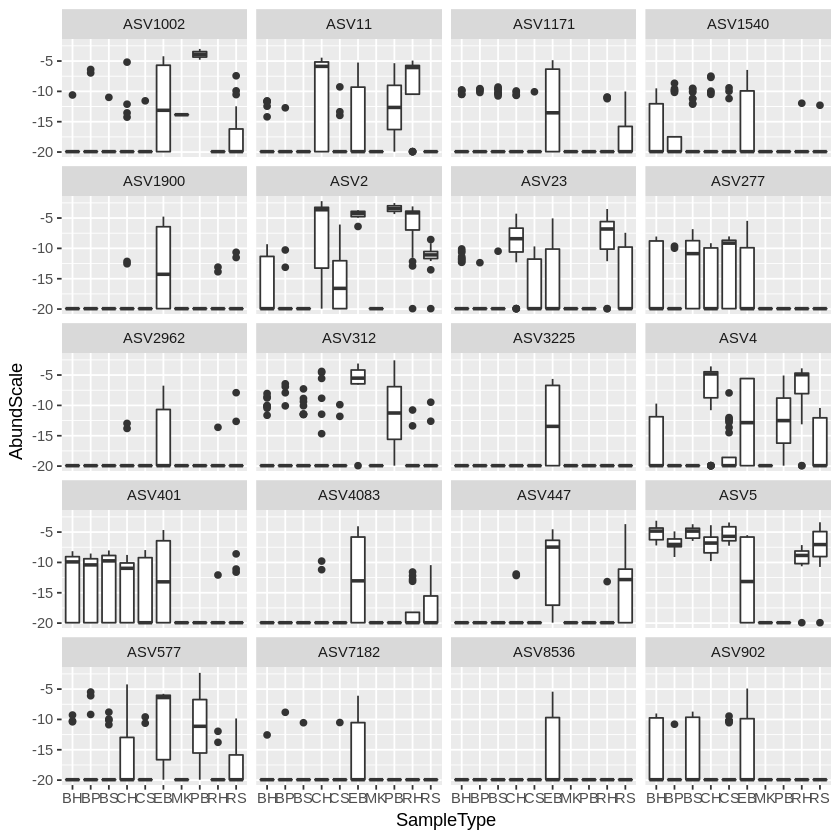

In [44]:

tmp.p %>%
    mutate(AbundScale = log2(Abundance + .000001)) %>%
    filter(OTU %in% EBlist[1:20]) %>%
    ggplot(aes(x = SampleType, y = AbundScale)) +
    geom_boxplot() +
    #scale_y_continuous(trans = "log2")+
    facet_wrap(~OTU, ncol = 4)

In [46]:
prune_taxa(EBlist[1:20], ps) %>% tax_table()

,Kingdom,Phylum,Class,Order,Family,Genus
ASV277,Bacteria,Acidobacteria,Subgroup_6,NA,NA,NA
ASV4,Bacteria,NA,NA,NA,NA,NA
ASV11,Bacteria,NA,NA,NA,NA,NA
ASV2,Bacteria,NA,NA,NA,NA,NA
ASV23,Bacteria,Fibrobacteres,Fibrobacteria,Fibrobacterales,Fibrobacteraceae,possible_genus_04
ASV1540,Bacteria,Bacteroidetes,Bacteroidia,Cytophagales,Microscillaceae,Ohtaekwangia
ASV7182,Bacteria,Bacteroidetes,Bacteroidia,Chitinophagales,Chitinophagaceae,Terrimonas
ASV1900,Bacteria,Firmicutes,Bacilli,Lactobacillales,Streptococcaceae,Streptococcus
ASV8536,Bacteria,Firmicutes,Bacilli,Bacillales,Family_XI,Gemella
ASV902,Bacteria,Firmicutes,Bacilli,Bacillales,Bacillaceae,Bacillus


In [50]:
tmp.p %>% filter(Abundance > 0) %>% .$Abundance %>% min()

[1] 1.249407e-05

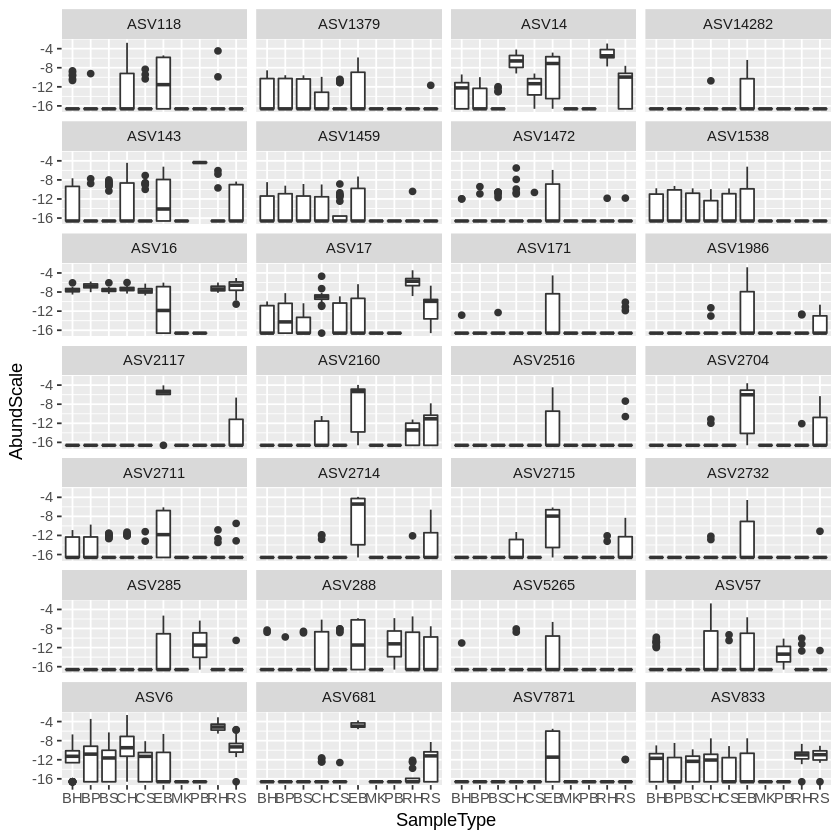

In [51]:

tmp.p %>%
    mutate(AbundScale = log2(Abundance + .00001)) %>%
    filter(OTU %in% EBlist[21:48]) %>%
    ggplot(aes(x = SampleType, y = AbundScale)) +
    geom_boxplot() +
    #scale_y_continuous(trans = "log2")+
    facet_wrap(~OTU, ncol = 4)

In [72]:
prune_taxa(EBlist[21:48], ps) %>% tax_table()

ERROR: Error in (function (classes, fdef, mtable) : unable to find an inherited method for function ‘prune_taxa’ for signature ‘"list", "phyloseq"’


In [56]:
otu_table(EB) %>% t() %>% .[c('ASV14', 'ASV6', 'ASV681', 'ASV285', 'ASV17'),]

,187_139-BK,188_155-BK,189_187-BK,89_125-BK,90_29-BK,91_77-BK
ASV14,83,9,43,0,75,0
ASV6,0,7,0,0,0,33
ASV681,173,138,112,111,71,93
ASV285,0,0,32,0,88,0
ASV17,0,20,0,0,0,39


In [181]:
#filter_taxa(EB, function(x) sum(x > 0) > 1, TRUE)
tmp = filter_taxa(EB, function(x) sum(x > 0) > 1, TRUE) %>% taxa_sums(.) %>% as.data.frame()   
tmp$ASV = row.names(tmp)
colnames(tmp)[1] = 'Abundance'
tmp %>% arrange(desc(Abundance))
EBlist = tmp %>% arrange(desc(Abundance)) %>% .$ASV %>% as.list()

Abundance,ASV
986,ASV2
810,ASV312
698,ASV681
540,ASV1986
484,ASV2714
460,ASV2160
446,ASV2117
401,ASV2704
310,ASV1002
272,ASV4083


In [84]:
ps.m = psmelt(ps.norm)



Warning message in psmelt(ps.norm):
“The sample variables: 
Sample
 have been renamed to: 
sample_Sample
to avoid conflicts with special phyloseq plot attribute names.”

In [131]:
ps.m = ps.m %>% mutate(AbundScale = log2(Abundance + .000001))

## print plots of potential contaminants to pdf

In [182]:
length(EBlist)

[1] 48

In [183]:

pdf('~/Hyphosphere/Exp11/EB_ContaminantCheck_48.pdf')    

for(cTax in EBlist){
    
    plot1 = filter(ps.m, OTU == cTax & SampleType %in% c("EB", "PB", "MK")) %>%
    ggplot(., aes(x=interaction(Treatment,Rep), y= AbundScale)) +
    geom_point()+
    facet_grid(Soil~SampleType, scales = 'free_x')+
    ggtitle(as.character(cTax))+
    ylab('Relative abundance (log2)')

    plot2 = filter(ps.m, OTU == cTax & !SampleType %in% c("EB", "PB", "MK") & Soil %in% c("Dryden", "Pendelton", "Florence")) %>%
    ggplot(., aes(x=interaction(Treatment,Rep), y= AbundScale)) +
    geom_point()+
    facet_grid(Soil~SampleType, scales = 'free_x')+
    ggtitle(as.character(cTax))+
    ylab('Relative abundance (log2)')


    print(plot1)
    print(plot2)
    }
dev.off()
    

png 
  2

In [204]:
tax_table(ps.norm)["ASV11",]

,Kingdom,Phylum,Class,Order,Family,Genus
ASV11,Bacteria,NA,NA,NA,NA,NA


In [206]:
tx = 'ASV14'
df = ps.norm %>% prune_taxa(tx,.) %>% otu_table() %>% as.data.frame() %>% 
    mutate(sample = row.names(.)) %>% filter(ASV14  > 0) %>% arrange(desc(ASV14 ))
df

Warning message in prune_taxa(taxa, phy_tree(x)):
“prune_taxa attempted to reduce tree to 1 or fewer tips.
 tree replaced with NULL.”

ASV14,sample
0.13198464,77_GVN7HN1-RH
0.06796461,172_GVN7HN3-RH
0.06247747,164_GVFLHN3-RH
0.06229730,79_GVN7HN2-RH
0.05482784,70_GVFLHN2-CH
0.05271994,65_GVCLHN2-RH
0.05174227,166_GVFLHN4-CH
0.04317154,161_GVCLHN4-RH
0.03746177,95_GVCLHN2-CH
0.03547657,163_GVFLHN3-CH


# Check raw counts for ASV14 and ASV18

In [217]:
#ps = readRDS(file = '~/Hyphosphere/Exp11/Exp11_phyloseq.rds')
ps %>% subset_samples(., SampleType == 'EB') %>% prune_taxa(c("ASV53", "ASV153"), .) %>% sample_sums() 

187_139-BK 188_155-BK 189_187-BK  89_125-BK   90_29-BK   91_77-BK 
         0          0          0          0          0          0

In [221]:
a = ps %>% subset_samples(., SampleType == 'CH' & Fungus == "Gv") %>% prune_taxa(c("ASV23", "ASV45"), .) %>% sample_sums() 
b = ps %>% subset_samples(., SampleType == 'CH' & Fungus == "Gv")  %>% sample_sums() 
cbind(a,b)

,a,b
157_GVCLHN3-CH,32,41892
160_GVCLHN4-CH,184,62296
163_GVFLHN3-CH,65,45974
166_GVFLHN4-CH,29,72262
169_GVFLHP3-CH,0,56790
170_GVFLHP4-CH,31,47894
171_GVN7HN3-CH,2974,49926
173_GVN7HN4-CH,2282,48422
176_GVN7HP3-CH,2489,71303
177_GVN7HP4-CH,1325,58007


In [216]:
a = ps %>% subset_samples(., SampleType == 'CH' & Fungus == "Gv") %>% prune_taxa(c("ASV14", "ASV18"), .) %>% sample_sums() 
b = ps %>% subset_samples(., SampleType == 'CH' & Fungus == "Gv")  %>% sample_sums() 
cbind(a,b)

,a,b
157_GVCLHN3-CH,2130,41892
160_GVCLHN4-CH,2237,62296
163_GVFLHN3-CH,2002,45974
166_GVFLHN4-CH,6451,72262
169_GVFLHP3-CH,1055,56790
170_GVFLHP4-CH,794,47894
171_GVN7HN3-CH,1157,49926
173_GVN7HN4-CH,917,48422
176_GVN7HP3-CH,1234,71303
177_GVN7HP4-CH,906,58007


# Exp 1

In [42]:
ps1 = readRDS('~/Hyphosphere/Exp1/Exp1_phyloseq.rds')



Warning message in psmelt(.):
“The sample variables: 
Sample
 have been renamed to: 
sample_Sample
to avoid conflicts with special phyloseq plot attribute names.”

Controls in Experiment 1

* Hneg1 - Negative control extraction blank
NegativeH2O_S282 - Bart lab unknown blank

UMGC - pcr blanks
UMGC_H2O_001_A04_S4
UMGC_H2O_001_A06_S6
UMGC_H2O_002_B04_S112
UMGC_H2O_002_B06_S114
UMGC_H2O_003_A07_S199
UMGC_H2O_003_G11_S275
UMGC_H2O_004_F03_S306

In [50]:
ps1.snorm = transform_sample_counts(ps1, function(x) x/sum(x))
ps1.m = psmelt(ps1.snorm)
ps1.m = ps1.m %>% mutate(AbundScale = log2(Abundance + .000001))

Warning message in psmelt(ps1.snorm):
“The sample variables: 
Sample
 have been renamed to: 
sample_Sample
to avoid conflicts with special phyloseq plot attribute names.”

In [43]:
EB = subset_samples(ps1, SampleType == "EB")
EB = filter_taxa(EB, function(x) sum(x > 0) > 0, TRUE)
EB.snorm = transform_sample_counts(EB, function(x) x/sum(x))
sample_names(EB)

[1] "Hneg1_S263"

In [44]:
EB %>% psmelt() %>%
    arrange(desc(Abundance)) 

Warning message in psmelt(.):
“The sample variables: 
Sample
 have been renamed to: 
sample_Sample
to avoid conflicts with special phyloseq plot attribute names.”

OTU,Sample,Abundance,sample_Sample,Experiment,Plant,Fungus,Soil,SampleType,Treatment,TimePoint,DAI,Rep,Concentration_ng.ul,Kingdom,Phylum,Class,Order,Family,Genus
ASV1900,Hneg1_S263,224,Hneg1,1,,,,EB,,NA,NA,NA,0,Bacteria,Firmicutes,Bacilli,Lactobacillales,Streptococcaceae,Streptococcus
ASV26,Hneg1_S263,63,Hneg1,1,,,,EB,,NA,NA,NA,0,Bacteria,Bacteroidetes,Bacteroidia,Flavobacteriales,Flavobacteriaceae,Flavobacterium
ASV49,Hneg1_S263,53,Hneg1,1,,,,EB,,NA,NA,NA,0,Bacteria,Proteobacteria,Alphaproteobacteria,Rhizobiales,Rhizobiaceae,Brucella
ASV284,Hneg1_S263,50,Hneg1,1,,,,EB,,NA,NA,NA,0,Bacteria,Proteobacteria,Gammaproteobacteria,Xanthomonadales,Rhodanobacteraceae,Luteibacter
ASV14332,Hneg1_S263,38,Hneg1,1,,,,EB,,NA,NA,NA,0,Bacteria,Actinobacteria,Actinobacteria,Propionibacteriales,Propionibacteriaceae,Cutibacterium
ASV16,Hneg1_S263,38,Hneg1,1,,,,EB,,NA,NA,NA,0,Bacteria,Proteobacteria,Alphaproteobacteria,Rhizobiales,Xanthobacteraceae,Bradyrhizobium
ASV681,Hneg1_S263,37,Hneg1,1,,,,EB,,NA,NA,NA,0,Bacteria,Proteobacteria,Gammaproteobacteria,Enterobacteriales,Enterobacteriaceae,Escherichia/Shigella
ASV1706,Hneg1_S263,29,Hneg1,1,,,,EB,,NA,NA,NA,0,Bacteria,Firmicutes,Bacilli,Lactobacillales,Streptococcaceae,Streptococcus
ASV2395,Hneg1_S263,24,Hneg1,1,,,,EB,,NA,NA,NA,0,Bacteria,Proteobacteria,Gammaproteobacteria,Betaproteobacteriales,Burkholderiaceae,Ralstonia
ASV12695,Hneg1_S263,20,Hneg1,1,,,,EB,,NA,NA,NA,0,Bacteria,Proteobacteria,Alphaproteobacteria,Sphingomonadales,Sphingomonadaceae,Sphingobium


In [46]:
PB = subset_samples(ps1, SampleType == "PB")
PB = filter_taxa(PB, function(x) sum(x > 0) > 1, TRUE)
#PB.snorm = transform_sample_counts(EB, function(x) x/sum(x))
sample_names(PB)

[1] "NegativeH2O_S282"      "UMGC_H2O_001_A04_S4"   "UMGC_H2O_001_A06_S6"  
[4] "UMGC_H2O_002_B04_S112" "UMGC_H2O_002_B06_S114" "UMGC_H2O_003_A07_S199"
[7] "UMGC_H2O_003_G11_S275" "UMGC_H2O_004_F03_S306"

In [51]:
PB %>% psmelt() %>%
    arrange(desc(Abundance))  %>%
    filter(Abundance > 0)

Warning message in psmelt(.):
“The sample variables: 
Sample
 have been renamed to: 
sample_Sample
to avoid conflicts with special phyloseq plot attribute names.”

OTU,Sample,Abundance,sample_Sample,Experiment,Plant,Fungus,Soil,SampleType,Treatment,TimePoint,DAI,Rep,Concentration_ng.ul,Kingdom,Phylum,Class,Order,Family,Genus
ASV4437,UMGC_H2O_001_A06_S6,379,UMGC_H2O_001_A06_S6,1,,,,PB,,NA,NA,NA,NA,Bacteria,Actinobacteria,Actinobacteria,Actinomycetales,Actinomycetaceae,Actinomyces
ASV2180,UMGC_H2O_001_A06_S6,315,UMGC_H2O_001_A06_S6,1,,,,PB,,NA,NA,NA,NA,Bacteria,Firmicutes,Bacilli,Bacillales,Planococcaceae,Lysinibacillus
ASV2395,UMGC_H2O_001_A04_S4,201,UMGC_H2O_001_A04_S4,1,,,,PB,,NA,NA,NA,NA,Bacteria,Proteobacteria,Gammaproteobacteria,Betaproteobacteriales,Burkholderiaceae,Ralstonia
ASV6987,UMGC_H2O_002_B06_S114,121,UMGC_H2O_002_B06_S114,1,,,,PB,,NA,NA,NA,NA,Bacteria,Proteobacteria,Gammaproteobacteria,Xanthomonadales,Xanthomonadaceae,Stenotrophomonas
ASV8061,UMGC_H2O_003_A07_S199,83,UMGC_H2O_003_A07_S199,1,,,,PB,,NA,NA,NA,NA,Bacteria,Firmicutes,Negativicutes,Selenomonadales,Veillonellaceae,Veillonella
ASV9101,UMGC_H2O_001_A06_S6,83,UMGC_H2O_001_A06_S6,1,,,,PB,,NA,NA,NA,NA,Bacteria,Fusobacteria,Fusobacteriia,Fusobacteriales,Leptotrichiaceae,Leptotrichia
ASV4437,UMGC_H2O_001_A04_S4,77,UMGC_H2O_001_A04_S4,1,,,,PB,,NA,NA,NA,NA,Bacteria,Actinobacteria,Actinobacteria,Actinomycetales,Actinomycetaceae,Actinomyces
ASV2395,UMGC_H2O_002_B04_S112,55,UMGC_H2O_002_B04_S112,1,,,,PB,,NA,NA,NA,NA,Bacteria,Proteobacteria,Gammaproteobacteria,Betaproteobacteriales,Burkholderiaceae,Ralstonia
ASV34,UMGC_H2O_003_A07_S199,54,UMGC_H2O_003_A07_S199,1,,,,PB,,NA,NA,NA,NA,Bacteria,Proteobacteria,Gammaproteobacteria,Betaproteobacteriales,Burkholderiaceae,Delftia
ASV2180,UMGC_H2O_003_A07_S199,48,UMGC_H2O_003_A07_S199,1,,,,PB,,NA,NA,NA,NA,Bacteria,Firmicutes,Bacilli,Bacillales,Planococcaceae,Lysinibacillus


In [55]:
EBlist = EB %>% taxa_names()
PBlist = PB %>% taxa_names()
length(EBlist)
length(PBlist)

Clist = c(EBlist, PBlist) %>% unique()
length(Clist)

[1] 12

[1] 7

[1] 18

In [66]:
pdf('~/Hyphosphere/Exp1/Blank_ContaminantCheck_18.pdf')    

for(cTax in Clist){

    plot1 = filter(ps1.m, OTU == cTax & SampleType %in% c("EB", "PB", "MK")) %>%
    ggplot(., aes(x=SampleType, y= AbundScale)) +
    geom_point()+
    facet_wrap(SampleType~Sample, scales = 'free_x')+
    ggtitle(as.character(cTax))+
    ylab('Relative abundance (log2)')

    plot2 = filter(ps1.m, OTU == cTax & SampleType %in% c("CH", "CS", "RT")) %>%
    ggplot(., aes(x = SampleType, y= AbundScale)) +
    geom_point()+
    geom_boxplot()+
    facet_grid(Soil~SampleType, scales = 'free_x')+
    ggtitle(as.character(cTax))+
    ylab('Relative abundance (log2)')


    print(plot1)
    print(plot2)
    }
dev.off()

png 
  2

# Exp2

Controls in Experiment 10

Negative ontrols in library
1) 94 Plate blank
2) 96 Plate blank
3) 147 T0 - this was a failed extraction, apparently only contaminants came through.  
4) 192 - Extraction plate blank
5) 151 - Blank between spores and soil samples

Mock communities
191 - Hay lab mock community
95 - BDE mock community

Not really a control
160 - This is a hyphal sample that was not labeled on the extraction sheet

In [2]:
ps = readRDS(file = '~/Hyphosphere/Exp10/Exp10_phyloseq.rds')
ps

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 10702 taxa and 192 samples ]
sample_data() Sample Data:       [ 192 samples by 11 sample variables ]
tax_table()   Taxonomy Table:    [ 10702 taxa by 6 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 10702 tips and 10680 internal nodes ]

In [3]:
ps.m = ps %>% psmelt()

Warning message in psmelt(.):
“The sample variables: 
Sample
 have been renamed to: 
sample_Sample
to avoid conflicts with special phyloseq plot attribute names.”

In [3]:
MC = subset_samples(ps, Sample == "MockComm")
MC = filter_taxa(MC, function(x) sum(x > 0) > 0, TRUE)
MC

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9 taxa and 1 samples ]
sample_data() Sample Data:       [ 1 samples by 11 sample variables ]
tax_table()   Taxonomy Table:    [ 9 taxa by 6 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9 tips and 8 internal nodes ]

In [5]:
MC %>% psmelt() %>%
    arrange(desc(Abundance)) 

Warning message in psmelt(.):
“The sample variables: 
Sample
 have been renamed to: 
sample_Sample
to avoid conflicts with special phyloseq plot attribute names.”

OTU,Sample,Abundance,sample_Sample,Experiment,Plant,Fungus,Soil,SampleType,Treatment,TimePoint,DAI,Rep,Concentration_ng.ul,Kingdom,Phylum,Class,Order,Family,Genus
ASV120,95_Mock,8138,MockComm,2,,,,MK,,NA,NA,NA,0.12,Bacteria,Bacteroidetes,Bacteroidia,Cytophagales,Spirosomaceae,Dyadobacter
ASV173,95_Mock,5797,MockComm,2,,,,MK,,NA,NA,NA,0.12,Bacteria,Proteobacteria,Alphaproteobacteria,Sphingomonadales,Sphingomonadaceae,Sphingomonas
ASV183,95_Mock,5303,MockComm,2,,,,MK,,NA,NA,NA,0.12,Bacteria,Deinococcus-Thermus,Deinococci,Deinococcales,Deinococcaceae,Deinococcus
ASV231,95_Mock,4802,MockComm,2,,,,MK,,NA,NA,NA,0.12,Bacteria,Actinobacteria,Actinobacteria,Propionibacteriales,Nocardioidaceae,Aeromicrobium
ASV93,95_Mock,4651,MockComm,2,,,,MK,,NA,NA,NA,0.12,Bacteria,Proteobacteria,Gammaproteobacteria,Xanthomonadales,Xanthomonadaceae,Lysobacter
ASV131,95_Mock,4010,MockComm,2,,,,MK,,NA,NA,NA,0.12,Bacteria,Proteobacteria,Gammaproteobacteria,Pseudomonadales,Pseudomonadaceae,Pseudomonas
ASV275,95_Mock,3763,MockComm,2,,,,MK,,NA,NA,NA,0.12,Bacteria,Firmicutes,Bacilli,Bacillales,Bacillaceae,Bacillus
ASV34,95_Mock,3546,MockComm,2,,,,MK,,NA,NA,NA,0.12,Bacteria,Proteobacteria,Gammaproteobacteria,Betaproteobacteriales,Burkholderiaceae,Delftia
ASV242,95_Mock,3454,MockComm,2,,,,MK,,NA,NA,NA,0.12,Bacteria,Firmicutes,Bacilli,Bacillales,Paenibacillaceae,Paenibacillus


In [8]:
sample_data(ps)$SampleType %>% unique()

[1] RH BP CS BS RT CH T0 EB GV    MK
Levels:  BP BS CH CS EB GV MK RH RT T0

In [4]:
EB = subset_samples(ps, Sample == "ExtractionBlank")
EB = filter_taxa(EB, function(x) sum(x > 0) > 0, TRUE)
EB.snorm = transform_sample_counts(EB, function(x) x/sum(x))
sample_names(EB)

[1] "151_ExtractionBlank" "192_ExtractionBlank" "94_ExtractionBlank" 
[4] "96_ExtractionBlank"

In [9]:
EBlist = filter_taxa(EB, function(x) sum(x > 0) > 0, TRUE) %>% taxa_names()
length(EBlist)
EBlist

[1] 607

[1] "ASV736"   "ASV8660"  "ASV340"   "ASV1914"  "ASV219"   "ASV209"  
  [7] "ASV212"   "ASV1318"  "ASV11077" "ASV1793"  "ASV7141"  "ASV2475" 
 [13] "ASV1158"  "ASV4327"  "ASV2439"  "ASV2647"  "ASV3883"  "ASV184"  
 [19] "ASV8133"  "ASV1645"  "ASV1033"  "ASV3433"  "ASV1670"  "ASV875"  
 [25] "ASV7813"  "ASV8441"  "ASV277"   "ASV187"   "ASV273"   "ASV2501" 
 [31] "ASV427"   "ASV307"   "ASV1335"  "ASV5588"  "ASV2824"  "ASV9688" 
 [37] "ASV3026"  "ASV4961"  "ASV584"   "ASV129"   "ASV729"   "ASV235"  
 [43] "ASV1759"  "ASV268"   "ASV1030"  "ASV758"   "ASV4482"  "ASV297"  
 [49] "ASV461"   "ASV58"    "ASV20413" "ASV12769" "ASV15157" "ASV3273" 
 [55] "ASV564"   "ASV8967"  "ASV2922"  "ASV10727" "ASV12065" "ASV11105"
 [61] "ASV694"   "ASV7435"  "ASV463"   "ASV9114"  "ASV4802"  "ASV260"  
 [67] "ASV1291"  "ASV10316" "ASV4505"  "ASV1427"  "ASV10856" "ASV3904" 
 [73] "ASV6899"  "ASV11098" "ASV19"    "ASV4724"  "ASV666"   "ASV3213" 
 [79] "ASV670"   "ASV12626" "ASV11439" "ASV1455"  "ASV3074"  "ASV12631"
 [85] "ASV862"   "ASV885"   "ASV838"   "ASV808"   "ASV14493" "ASV1736" 
 [91] "ASV13850" "ASV4852"  "ASV1871"  "ASV2697"  "ASV971"   "ASV1834" 
 [97] "ASV5726"  "ASV1971"  "ASV15832" "ASV6304"  "ASV1251"  "ASV11688"
[103] "ASV9333"  "ASV12522" "ASV8986"  "ASV3544"  "ASV38"    "ASV11348"
[109] "ASV4079"  "ASV1403"  "ASV7739"  "ASV12306" "ASV1910"  "ASV2424" 
[115] "ASV1295"  "ASV6253"  "ASV109"   "ASV5715"  "ASV2926"  "ASV757"  
[121] "ASV6616"  "ASV3328"  "ASV8535"  "ASV381"   "ASV9287"  "ASV1502" 
[127] "ASV198"   "ASV3676"  "ASV2338"  "ASV21434" "ASV1801"  "ASV21623"
[133] "ASV3138"  "ASV5430"  "ASV452"   "ASV5693"  "ASV7640"  "ASV3500" 
[139] "ASV534"   "ASV9604"  "ASV13082" "ASV114"   "ASV1479"  "ASV8591" 
[145] "ASV491"   "ASV458"   "ASV108"   "ASV1081"  "ASV55"    "ASV1029" 
[151] "ASV565"   "ASV4259"  "ASV3773"  "ASV12625" "ASV11719" "ASV641"  
[157] "ASV19598" "ASV1311"  "ASV1988"  "ASV96"    "ASV618"   "ASV1371" 
[163] "ASV9551"  "ASV17742" "ASV2855"  "ASV3223"  "ASV23352" "ASV12301"
[169] "ASV1312"  "ASV2778"  "ASV365"   "ASV1408"  "ASV3072"  "ASV3022" 
[175] "ASV4341"  "ASV8499"  "ASV798"   "ASV1699"  "ASV8965"  "ASV323"  
[181] "ASV228"   "ASV392"   "ASV104"   "ASV65"    "ASV374"   "ASV264"  
[187] "ASV470"   "ASV558"   "ASV5291"  "ASV516"   "ASV1040"  "ASV14486"
[193] "ASV112"   "ASV224"   "ASV244"   "ASV24"    "ASV6844"  "ASV2148" 
[199] "ASV6624"  "ASV2118"  "ASV8966"  "ASV16980" "ASV8476"  "ASV1123" 
[205] "ASV1096"  "ASV3975"  "ASV200"   "ASV7242"  "ASV974"   "ASV592"  
[211] "ASV328"   "ASV75"    "ASV404"   "ASV2531"  "ASV1224"  "ASV10500"
[217] "ASV8866"  "ASV1"     "ASV54"    "ASV78"    "ASV250"   "ASV1178" 
[223] "ASV4267"  "ASV816"   "ASV1217"  "ASV1064"  "ASV52"    "ASV3932" 
[229] "ASV48"    "ASV8"     "ASV43"    "ASV29"    "ASV115"   "ASV191"  
[235] "ASV1344"  "ASV3929"  "ASV1890"  "ASV393"   "ASV16"    "ASV486"  
[241] "ASV622"   "ASV1415"  "ASV1511"  "ASV428"   "ASV133"   "ASV36"   
[247] "ASV4480"  "ASV21"    "ASV206"   "ASV4120"  "ASV1046"  "ASV856"  
[253] "ASV953"   "ASV203"   "ASV12430" "ASV33"    "ASV1537"  "ASV243"  
[259] "ASV147"   "ASV2762"  "ASV136"   "ASV3"     "ASV336"   "ASV319"  
[265] "ASV5074"  "ASV4804"  "ASV608"   "ASV665"   "ASV3623"  "ASV13938"
[271] "ASV158"   "ASV77"    "ASV326"   "ASV1773"  "ASV733"   "ASV2042" 
[277] "ASV71"    "ASV271"   "ASV7860"  "ASV10427" "ASV5211"  "ASV87"   
[283] "ASV6422"  "ASV6"     "ASV790"   "ASV2346"  "ASV4816"  "ASV1273" 
[289] "ASV15742" "ASV633"   "ASV1269"  "ASV576"   "ASV137"   "ASV932"  
[295] "ASV612"   "ASV1627"  "ASV4245"  "ASV1525"  "ASV309"   "ASV126"  
[301] "ASV1533"  "ASV1247"  "ASV234"   "ASV3555"  "ASV74"    "ASV1288" 
[307] "ASV14284" "ASV2900"  "ASV481"   "ASV339"   "ASV662"   "ASV455"  
[313] "ASV6557"  "ASV851"   "ASV8184"  "ASV258"   "ASV696"   "ASV1299" 
[319] "ASV2113"  "ASV253"   "ASV300"   "ASV40"    "ASV12"    "ASV1531" 
[325] "ASV285"   "ASV17"    "ASV27"    "ASV409"   "ASV15"    "ASV2103" 
[331] "ASV34"    "ASV192"   "ASV2395"  "AS

In [10]:
"ASV791" %in% EBlist

[1] FALSE

In [6]:

EB.m = psmelt(EB.snorm)
EB.m = EB.m %>% mutate(AbundScale = log2(Abundance + .000001))

Warning message in psmelt(EB.snorm):
“The sample variables: 
Sample
 have been renamed to: 
sample_Sample
to avoid conflicts with special phyloseq plot attribute names.”Warning message:
“The `printer` argument is deprecated as of rlang 0.3.0.
This warning is displayed once per session.”

In [7]:
sample_data(EB.m) %>% head()

,OTU,Sample,Abundance,sample_Sample,Experiment,Plant,Fungus,Soil,SampleType,Treatment,⋯,DAI,Rep,Concentration_ng.ul,Kingdom,Phylum,Class,Order,Family,Genus,AbundScale
sa1,ASV1,192_ExtractionBlank,0.6384749,ExtractionBlank,2,,,,EB,,⋯,NA,NA,0.073,Bacteria,Proteobacteria,Alphaproteobacteria,Rhizobiales,Rhizobiaceae,Phyllobacterium,-0.6472960
sa2,ASV1,151_ExtractionBlank,0.5120572,ExtractionBlank,2,,,,EB,,⋯,NA,NA,0.103,Bacteria,Proteobacteria,Alphaproteobacteria,Rhizobiales,Rhizobiaceae,Phyllobacterium,-0.9656203
sa3,ASV3,151_ExtractionBlank,0.3039671,ExtractionBlank,2,,,,EB,,⋯,NA,NA,0.103,Bacteria,Proteobacteria,Alphaproteobacteria,Sphingomonadales,Sphingomonadaceae,Sphingomonas,-1.7180081
sa4,ASV3,192_ExtractionBlank,0.2909635,ExtractionBlank,2,,,,EB,,⋯,NA,NA,0.073,Bacteria,Proteobacteria,Alphaproteobacteria,Sphingomonadales,Sphingomonadaceae,Sphingomonas,-1.7810851
sa5,ASV6,96_ExtractionBlank,0.2425959,ExtractionBlank,2,,,,EB,,⋯,NA,NA,0.123,Bacteria,Proteobacteria,Gammaproteobacteria,Cellvibrionales,Cellvibrionaceae,Cellvibrio,-2.0433672
sa6,ASV447,94_ExtractionBlank,0.1157470,ExtractionBlank,2,,,,EB,,⋯,NA,NA,0.119,Bacteria,Firmicutes,Bacilli,Bacillales,Staphylococcaceae,Staphylococcus,-3.1109412


In [27]:
ps.snorm = transform_sample_counts(ps, function(x) x/sum(x))
ps.m = psmelt(ps.snorm)
ps.m = ps.m %>% mutate(AbundScale = log2(Abundance + .000001))
                                

Warning message in psmelt(ps.snorm):
“The sample variables: 
Sample
 have been renamed to: 
sample_Sample
to avoid conflicts with special phyloseq plot attribute names.”

In [28]:
ps.m %>% head()

OTU,Sample,Abundance,sample_Sample,Experiment,Plant,Fungus,Soil,SampleType,Treatment,⋯,DAI,Rep,Concentration_ng.ul,Kingdom,Phylum,Class,Order,Family,Genus,AbundScale
ASV1,147_T0R1,0.6803279,T0R1,2,,,Dryden,T0,,⋯,NA,1,0.142,Bacteria,Proteobacteria,Alphaproteobacteria,Rhizobiales,Rhizobiaceae,Phyllobacterium,-0.5556958
ASV1,192_ExtractionBlank,0.6384749,ExtractionBlank,2,,,,EB,,⋯,NA,NA,0.073,Bacteria,Proteobacteria,Alphaproteobacteria,Rhizobiales,Rhizobiaceae,Phyllobacterium,-0.6472960
ASV1,152_GvSpores,0.6009966,GvSpores,2,,Gv,,GV,,⋯,NA,NA,0.101,Bacteria,Proteobacteria,Alphaproteobacteria,Rhizobiales,Rhizobiaceae,Phyllobacterium,-0.7345689
ASV1,165_5.1CH,0.5241498,5.1CH,2,5.1,Gv,Dryden,CH,HN,⋯,14,5,0.160,Bacteria,Proteobacteria,Alphaproteobacteria,Rhizobiales,Rhizobiaceae,Phyllobacterium,-0.9319461
ASV1,151_ExtractionBlank,0.5120572,ExtractionBlank,2,,,,EB,,⋯,NA,NA,0.103,Bacteria,Proteobacteria,Alphaproteobacteria,Rhizobiales,Rhizobiaceae,Phyllobacterium,-0.9656203
ASV1,158_1.4RH,0.5113633,1.4RH,2,1.4,Gv,Dryden,RH,HN,⋯,45,1,0.111,Bacteria,Proteobacteria,Alphaproteobacteria,Rhizobiales,Rhizobiaceae,Phyllobacterium,-0.9675766


In [38]:
pdf('~/Hyphosphere/Exp10/EB_ContaminantCheck_34.pdf')    

for(cTax in EBlist){
    
    plot1 = filter(ps.m, OTU == cTax & SampleType %in% c("EB", "PB", "MK")) %>%
    ggplot(., aes(x=SampleType, y= AbundScale)) +
    geom_point()+
    facet_wrap(SampleType~Sample, scales = 'free_x')+
    ggtitle(as.character(cTax))+
    ylab('Relative abundance (log2)')

    plot2 = filter(ps.m, OTU == cTax & !SampleType %in% c("EB", "PB", "MK", "T0") & !is.na(SampleType) & Soil %in% c("Dryden", "Pendelton", "Florence")) %>%
    ggplot(., aes(x=TimePoint, y= AbundScale)) +
    geom_point()+
    facet_grid(SampleType~Rep, scales = 'free_x')+
    ggtitle(as.character(cTax))+
    ylab('Relative abundance (log2)')


    print(plot1)
    print(plot2)
    }
dev.off()

Warning message:
“Removed 1 rows containing missing values (geom_point).”Warning message:
“Removed 1 rows containing missing values (geom_point).”Warning message:
“Removed 1 rows containing missing values (geom_point).”Warning message:
“Removed 1 rows containing missing values (geom_point).”Warning message:
“Removed 1 rows containing missing values (geom_point).”Warning message:
“Removed 1 rows containing missing values (geom_point).”Warning message:
“Removed 1 rows containing missing values (geom_point).”Warning message:
“Removed 1 rows containing missing values (geom_point).”Warning message:
“Removed 1 rows containing missing values (geom_point).”Warning message:
“Removed 1 rows containing missing values (geom_point).”Warning message:
“Removed 1 rows containing missing values (geom_point).”Warning message:
“Removed 1 rows containing missing values (geom_point).”Warning message:
“Removed 1 rows containing missing values (geom_point).”Warning message:
“Removed 1 rows containing missing

png 
  2

In [39]:
EB2 = filter_taxa(EB, function(x) sum(x > 0) > 1, TRUE) %>% tax_table()
EB2

,Kingdom,Phylum,Class,Order,Family,Genus
ASV224,Bacteria,Nitrospirae,Nitrospira,Nitrospirales,Nitrospiraceae,Nitrospira
ASV1,Bacteria,Proteobacteria,Alphaproteobacteria,Rhizobiales,Rhizobiaceae,Phyllobacterium
ASV54,Bacteria,Proteobacteria,Alphaproteobacteria,Rhizobiales,Rhizobiaceae,Phyllobacterium
ASV78,Bacteria,Proteobacteria,Alphaproteobacteria,Rhizobiales,Rhizobiaceae,Phyllobacterium
ASV8,Bacteria,Proteobacteria,Alphaproteobacteria,Caulobacterales,Caulobacteraceae,Asticcacaulis
ASV43,Bacteria,Proteobacteria,Alphaproteobacteria,Caulobacterales,Caulobacteraceae,Caulobacter
ASV16,Bacteria,Proteobacteria,Alphaproteobacteria,Rhizobiales,Xanthobacteraceae,Bradyrhizobium
ASV136,Bacteria,Proteobacteria,Alphaproteobacteria,Sphingomonadales,Sphingomonadaceae,Sphingomonas
ASV3,Bacteria,Proteobacteria,Alphaproteobacteria,Sphingomonadales,Sphingomonadaceae,Sphingomonas
ASV87,Bacteria,Proteobacteria,Gammaproteobacteria,CCD24,NA,NA


# Check distribution of potential contaminants across experiments

In [92]:
SuspectList = c("ASV1", "ASV54", "ASV78", "ASV136", "ASV3", "ASV12", "ASV2516", "ASV681", "ASV447",  "ASV49", "ASV12695", 
                "ASV2395", "ASV284", "ASV1706", "ASV1900", "ASV26", "ASV14332", "ASV2962", "ASV41", "ASV9101", "ASV34", "ASV2180",
               "ASV8061", "ASV4437", "ASV6987", "ASV39", "ASV143", "ASV2", "ASV1986", "ASV2714", "ASV2160", "ASV2117", "ASV2704", "ASV1002",
               "ASV4083", "ASV14", "ASV118", "ASV447", "ASV577", "ASV7871", "ASV1900", "ASV171", "ASV2516", "ASV8536", "ASV285", "ASV3225", "ASV2715",
               "ASV16", "ASV5265", "ASV2962", "ASV14282", "ASV833")
# did not include ASV10 -chloroplast needs to be removed

In [93]:
ps = readRDS(file = '~/Hyphosphere/data/3Exp/phyloseq/3Exp_phyloseq_thresh_wtree.rds')
#ps.sub.m = prune_samples(SuspectList, ps) %>% psmelt()

In [94]:
ps = transform_sample_counts(ps, function(x) x/sum(x))

In [95]:
SuspectList

[1] "ASV1"     "ASV54"    "ASV78"    "ASV136"   "ASV3"     "ASV12"   
 [7] "ASV2516"  "ASV681"   "ASV447"   "ASV49"    "ASV12695" "ASV2395" 
[13] "ASV284"   "ASV1706"  "ASV1900"  "ASV26"    "ASV14332" "ASV2962" 
[19] "ASV41"    "ASV9101"  "ASV34"    "ASV2180"  "ASV8061"  "ASV4437" 
[25] "ASV6987"  "ASV39"    "ASV143"   "ASV2"     "ASV1986"  "ASV2714" 
[31] "ASV2160"  "ASV2117"  "ASV2704"  "ASV1002"  "ASV4083"  "ASV14"   
[37] "ASV118"   "ASV447"   "ASV577"   "ASV7871"  "ASV1900"  "ASV171"  
[43] "ASV2516"  "ASV8536"  "ASV285"   "ASV3225"  "ASV2715"  "ASV16"   
[49] "ASV5265"  "ASV2962"  "ASV14282" "ASV833"

In [96]:
ps = prune_taxa(SuspectList, ps)

In [97]:
ps.m = ps %>% psmelt()
ps.m = ps.m %>% mutate(AbundScale = log2(Abundance + .000001))

Warning message in psmelt(.):
“The sample variables: 
Sample
 have been renamed to: 
sample_Sample
to avoid conflicts with special phyloseq plot attribute names.”

In [98]:
ps.m %>% head()

OTU,Sample,Abundance,sample_Sample,Experiment,Plant,Fungus,Soil,SampleType,Treatment,⋯,DAI,Rep,Concentration_ng.ul,Kingdom,Phylum,Class,Order,Family,Genus,AbundScale
ASV1,147_T0R1,0.6803279,T0R1,2,,,Dryden,T0,,⋯,NA,1,0.142,Bacteria,Proteobacteria,Alphaproteobacteria,Rhizobiales,Rhizobiaceae,Phyllobacterium,-0.5556958
ASV1,192_ExtractionBlank,0.6383936,ExtractionBlank,2,,,,EB,,⋯,NA,NA,0.073,Bacteria,Proteobacteria,Alphaproteobacteria,Rhizobiales,Rhizobiaceae,Phyllobacterium,-0.6474796
ASV6987,UMGC_H2O_002_B06_S114,0.6302083,UMGC_H2O_002_B06_S114,1,,,,PB,,⋯,NA,NA,NA,Bacteria,Proteobacteria,Gammaproteobacteria,Xanthomonadales,Xanthomonadaceae,Stenotrophomonas,-0.6660970
ASV1,152_GvSpores,0.5980167,GvSpores,2,,Gv,,GV,,⋯,NA,NA,0.101,Bacteria,Proteobacteria,Alphaproteobacteria,Rhizobiales,Rhizobiaceae,Phyllobacterium,-0.7417398
ASV2395,UMGC_H2O_001_A04_S4,0.5506849,UMGC_H2O_001_A04_S4,1,,,,PB,,⋯,NA,NA,NA,Bacteria,Proteobacteria,Gammaproteobacteria,Betaproteobacteriales,Burkholderiaceae,Ralstonia,-0.8606983
ASV1,165_5.1CH,0.5238792,5.1CH,2,5.1,Gv,Dryden,CH,HN,⋯,14,5,0.160,Bacteria,Proteobacteria,Alphaproteobacteria,Rhizobiales,Rhizobiaceae,Phyllobacterium,-0.9326912


In [99]:
pdf('~/Hyphosphere/3ex_ContaminantCheck.pdf')    

for(cTax in SuspectList){
    
    plot1 = filter(ps.m, OTU == cTax & SampleType %in% c("EB", "PB")) %>%
    ggplot(., aes(x=Sample, y= AbundScale)) +
    geom_point()+
    facet_grid(Experiment~SampleType, scales = 'free_x')+
    ggtitle(as.character(cTax))+
    ylab('Relative abundance (log2)')
    
    plot2 = filter(ps.m, Experiment == 1, OTU == cTax & SampleType %in% c("CH", "CS", "RT")) %>%
    ggplot(., aes(x = SampleType, y= AbundScale)) +
    geom_point()+
    geom_boxplot()+
    facet_grid(Soil~SampleType, scales = 'free_x')+
    ggtitle(as.character(cTax))+
    ylab('Relative abundance (log2)')

    plot3 = filter(ps.m, Experiment == 2, OTU == cTax & !SampleType %in% c("EB", "PB", "MK", "T0") & !is.na(SampleType) & Soil %in% c("Dryden", "Pendelton", "Florence")) %>%
    ggplot(., aes(x=TimePoint, y= AbundScale)) +
    geom_point()+
    facet_grid(SampleType~Rep, scales = 'free_x')+
    ggtitle(as.character(cTax))+
    ylab('Relative abundance (log2)')
    
    plot4 =  filter(ps.m, Experiment == 3, OTU == cTax & !SampleType %in% c("EB", "PB", "MK") & Soil %in% c("Dryden", "Pendelton", "Florence")) %>%
    ggplot(., aes(x=interaction(Treatment,Rep), y= AbundScale)) +
    geom_point()+
    facet_grid(Soil~SampleType, scales = 'free_x')+
    ggtitle(as.character(cTax))+
    ylab('Relative abundance (log2)')
    
    


    print(plot1)
    print(plot2)
    print(plot3)
    print(plot4)
    }
dev.off()

Warning message:
“Removed 1 rows containing missing values (geom_point).”Warning message:
“Removed 1 rows containing missing values (geom_point).”Warning message:
“Removed 1 rows containing missing values (geom_point).”Warning message:
“Removed 1 rows containing missing values (geom_point).”Warning message:
“Removed 1 rows containing missing values (geom_point).”Warning message:
“Removed 1 rows containing missing values (geom_point).”Warning message:
“Removed 1 rows containing missing values (geom_point).”Warning message:
“Removed 1 rows containing missing values (geom_point).”Warning message:
“Removed 1 rows containing missing values (geom_point).”Warning message:
“Removed 1 rows containing missing values (geom_point).”Warning message:
“Removed 1 rows containing missing values (geom_point).”Warning message:
“Removed 1 rows containing missing values (geom_point).”Warning message:
“Removed 1 rows containing missing values (geom_point).”Warning message:
“Removed 1 rows containing missing

png 
  2

In [102]:
ttab = ps %>% tax_table()

In [103]:
ttab

,Kingdom,Phylum,Class,Order,Family,Genus
ASV9101,Bacteria,Fusobacteria,Fusobacteriia,Fusobacteriales,Leptotrichiaceae,Leptotrichia
ASV49,Bacteria,Proteobacteria,Alphaproteobacteria,Rhizobiales,Rhizobiaceae,Brucella
ASV2715,Bacteria,Proteobacteria,Alphaproteobacteria,Rhodobacterales,Rhodobacteraceae,Paracoccus
ASV1,Bacteria,Proteobacteria,Alphaproteobacteria,Rhizobiales,Rhizobiaceae,Phyllobacterium
ASV54,Bacteria,Proteobacteria,Alphaproteobacteria,Rhizobiales,Rhizobiaceae,Phyllobacterium
ASV78,Bacteria,Proteobacteria,Alphaproteobacteria,Rhizobiales,Rhizobiaceae,Phyllobacterium
ASV16,Bacteria,Proteobacteria,Alphaproteobacteria,Rhizobiales,Xanthobacteraceae,Bradyrhizobium
ASV12695,Bacteria,Proteobacteria,Alphaproteobacteria,Sphingomonadales,Sphingomonadaceae,Sphingobium
ASV136,Bacteria,Proteobacteria,Alphaproteobacteria,Sphingomonadales,Sphingomonadaceae,Sphingomonas
ASV3,Bacteria,Proteobacteria,Alphaproteobacteria,Sphingomonadales,Sphingomonadaceae,Sphingomonas


In [114]:
ttab["ASV6987",]

,Kingdom,Phylum,Class,Order,Family,Genus
ASV6987,Bacteria,Proteobacteria,Gammaproteobacteria,Xanthomonadales,Xanthomonadaceae,Stenotrophomonas


# Final contamination removal

* ASV1 - Remove, serious contam in exp2, only scattered samples in Exp3
* ASV54 - Remove, only in exp2 and serious contam
* ASV78 - Remove, plate 2 contaminant, only in exp2
* ASV136 - Remove, plate 2 contaminant, only in exp2
* ASV3 - Remove, plate 2 contaminant, also in experiment 1, but only scattered samples in exp3
* ASV12 - Remove, potential plate 2 contaminant in exp2, but also in exp3. 
* ASV2516 - Remove, EB in 2 and 3, PB in 1,  more prevalent in blanks than samples
* ASV681 -Remove,  EB in all experiments, no PB, 2nd plate signal in exp2, scattered low biomass samples in exp3
* ASV447 -  Remove = EB in 2 and 3, single PB in 1, Remove, low biomass signal and prevalent in blanks
* ASV49 - EB in Exp1, not in any experimental samples
* ASV12695 - EB in exp 1, not experimental samples except 1CS and 1 RH from exp3
* ASV2395 - 1 EB in each experiment, three PBs in exp1, scattering of rh and ch from exp 2, no occurrence in ex3 an donly 1
* ASV284 - EB in exp1, no experimental samples
* ASV1706- Remove 1 EB in Exp1 and 2, only one sand CH in exp1, some CH and RH in exp2.  Likely a low biomass issue
* ASV1900 -Remove EB from all experiments, scattered occurrence
* ASV26 - EB exp 1, no experimental samples
* ASV14332 -Remove EB and 1PB in exp 1, 2 CH samples in exp 1, not present in exp 2 and 3
* ASV2962- Remove 1 EB exp1, 1 EB exp2, 2 EB exp3, 1 Ch exp1, 6 Ch and many RH in exp2, some Ch and RH and RS in experiment 35 
* ASV9101 Remove 2 PB in exp1, handful of samples in exp1, no detection in 2 and 3.  
* ASV2180 - Remove 2PB in exp1, only present in 1 sample in exp3, no samples in exp2 and 2 samples in exp1
* ASV8061 - Remove Two PB in exp1, not present in exp2 or 3
* ASV4437 - Remove - two PB in exp1, no experimental samples except two in exp2
* ASV6987 -Remove -  two PB exp 1, three CH samples in exp1, 3 CH samples in exp 2, none in exp3
* ASV2714  (remove)- 4 EB in exp3, handful of low biomass samples in exp3
* Asv2160 -(remove)4 eb IN EXP3, only low biomass samples in exp3, slightly more prevalent in Dryden soils, but decided to remove.  
* ASV2117 - Remove 5 EB in exp3, scattered presence in exp2 and only 5 RS samples in exp3
* ASV2704 - Remove 4 EB in exp3, not in other experiments and only few low biomass samples in exp 3
* ASV1002 - Remove, 3EB and 2PB in exp 3, no detection in exp1 and 2 no real soil or sample signature, but high abundance in couple BP, one CH
* ASV4083 - Remove, 3 EB exp 3, no detection in exp 1 and 2, couple low biomass samples in exp3
* ASV7871- Remove 3 EB in exp 3, no detection in experimental samples
* ASV1900 - Remove, EB in exp 1, 1 EB in exp2, and 3 eb in exp3, all at low abundance, unlikely to cause issue
* ASV171 -Remove  2 EB exp3, only 1 sample in exp 2 and four samples in exp 3.  no pattern.  
* ASV2516 - Remove 1PB exp1, 3 EB exp2, 2EB exp3, only 1 CH sample exp1, some CH and RH samples Exp2, only 2 RS samples exp3
* ASV8536 - Remove 1 EB exp2, 2 EB exp3, barely any experimental samples
* ASV285 - Remove 2 EB exp2, 2 EB exp3, 1 PB Exp3,  some CH and RH exp2 (not plate specific), no presence in exp3 or 1
* ASV3225 - Remove 1 EB exp2, 3 EB Exp3, no detection exp1, total of 7 CH and RH in exp2, no detection experiment 3
* ASV5265 - Remove 2 EB in exp3, not present in other experiments, only three samples in exp3.
* ASV2962 - Remove EB in exp1, 1 EB in exp2, 2 EB in exp3,   scattered in CH, RH and RS samples throughout
* ASV14282 - Remove 2 EB exp3, only 1 experimental sample in exp2 and 1 in exp3



In [115]:
FC = c("ASV1", 
"ASV54" ,
"ASV78", 
"ASV136", 
"ASV3", 
"ASV12",
"ASV2516",
"ASV681", 
"ASV447",
"ASV49", 
"ASV12695", 
"ASV2395", 
"ASV284", 
"ASV1706", 
"ASV1900", 
"ASV26", 
"ASV14332", 
"ASV2962",
"ASV9101",
"ASV2180", 
"ASV8061", 
"ASV4437", 
"ASV6987", 
"ASV2714",
"ASV2160", 
"ASV2117", 
"ASV2704", 
"ASV1002", 
"ASV4083",
"ASV7871", 
"ASV1900", 
"ASV171", 
"ASV2516", 
"ASV8536",
"ASV285", 
"ASV3225", 
"ASV5265", 
"ASV2962", 
"ASV14282")

In [128]:
ps = readRDS(file = '~/Hyphosphere/data/3Exp/phyloseq/3Exp_phyloseq_thresh_wtree.rds')
ps %>% print()
#remove ASVs in contaminant list

allTaxa = taxa_names(ps)
allTaxa <- allTaxa[!(allTaxa %in% FC)]
ps.sub = prune_taxa(allTaxa, ps)
# new phyloseq object with just the taxa you kept.
ps.sub

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 15434 taxa and 435 samples ]
sample_data() Sample Data:       [ 435 samples by 11 sample variables ]
tax_table()   Taxonomy Table:    [ 15434 taxa by 6 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 15434 tips and 15394 internal nodes ]


phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 15398 taxa and 435 samples ]
sample_data() Sample Data:       [ 435 samples by 11 sample variables ]
tax_table()   Taxonomy Table:    [ 15398 taxa by 6 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 15398 tips and 15358 internal nodes ]

In [129]:
ps.snorm = transform_sample_counts(ps, function(x) x/sum(x))
ps.sub.snorm = transform_sample_counts(ps.sub, function(x) x/sum(x))

# remove control samples
ps.snorm = ps.snorm %>% subset_samples(!SampleType %in% c("EB", "PB", "MK", "T0"))
ps.sub.snorm = ps.sub.snorm %>% subset_samples(!SampleType %in% c("EB", "PB", "MK", "T0"))                               

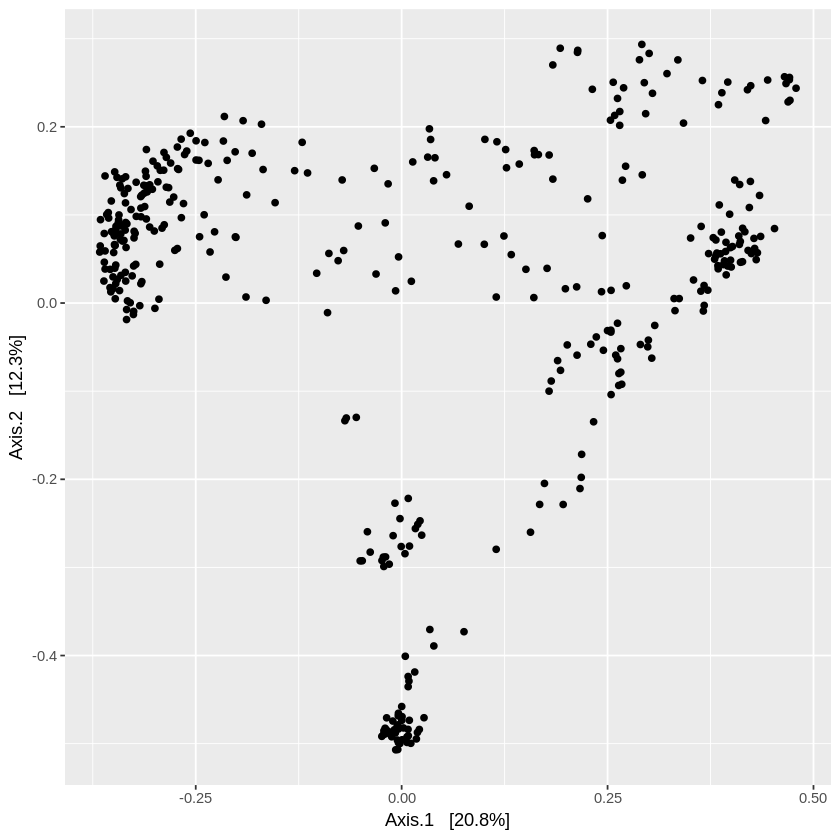

In [130]:
ordu = ordinate(ps.snorm, "PCoA", "bray")
p = plot_ordination(ps.snorm, ordu, justDF = TRUE)
plot_ordination(ps.snorm, ordu)

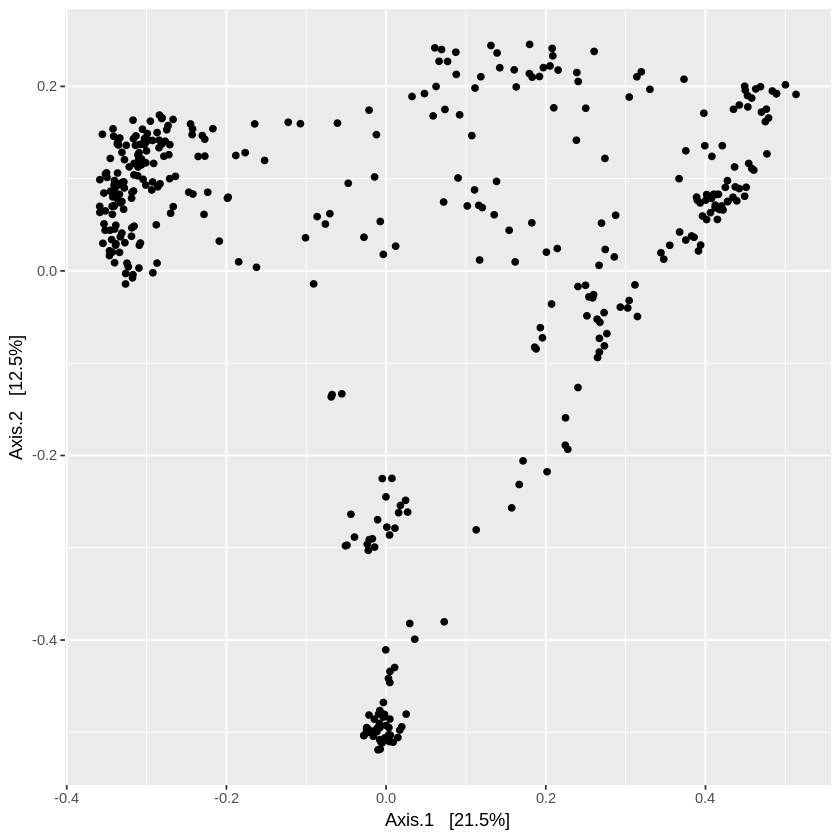

In [131]:
ordu.sub = ordinate(ps.sub.snorm, "PCoA", "bray")
p.sub = plot_ordination(ps.sub.snorm, ordu.sub, justDF = TRUE)
plot_ordination(ps.sub.snorm, ordu.sub)

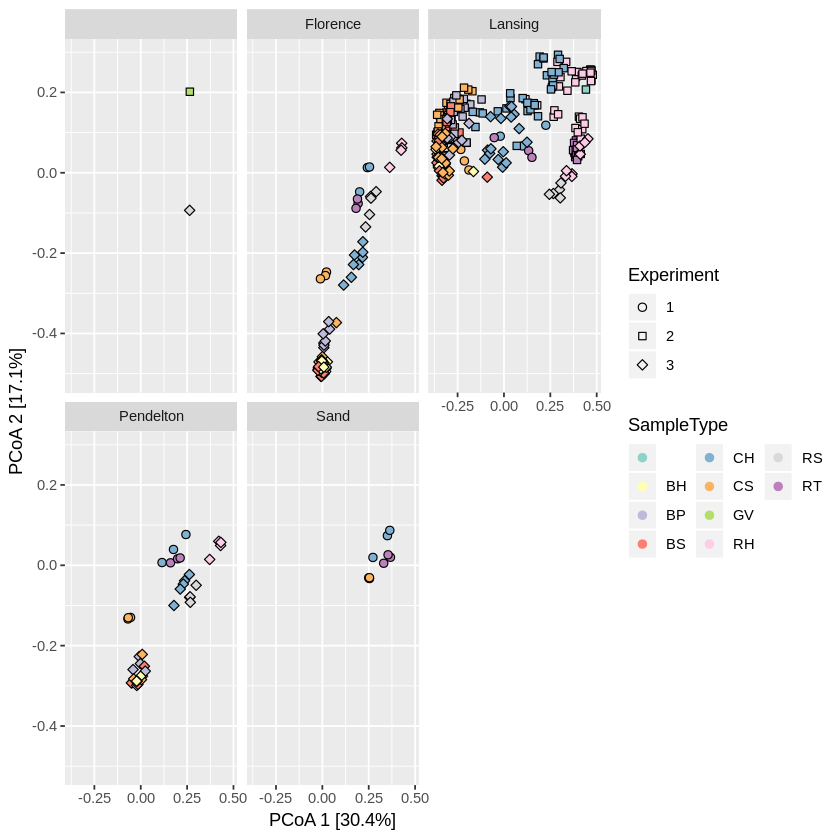

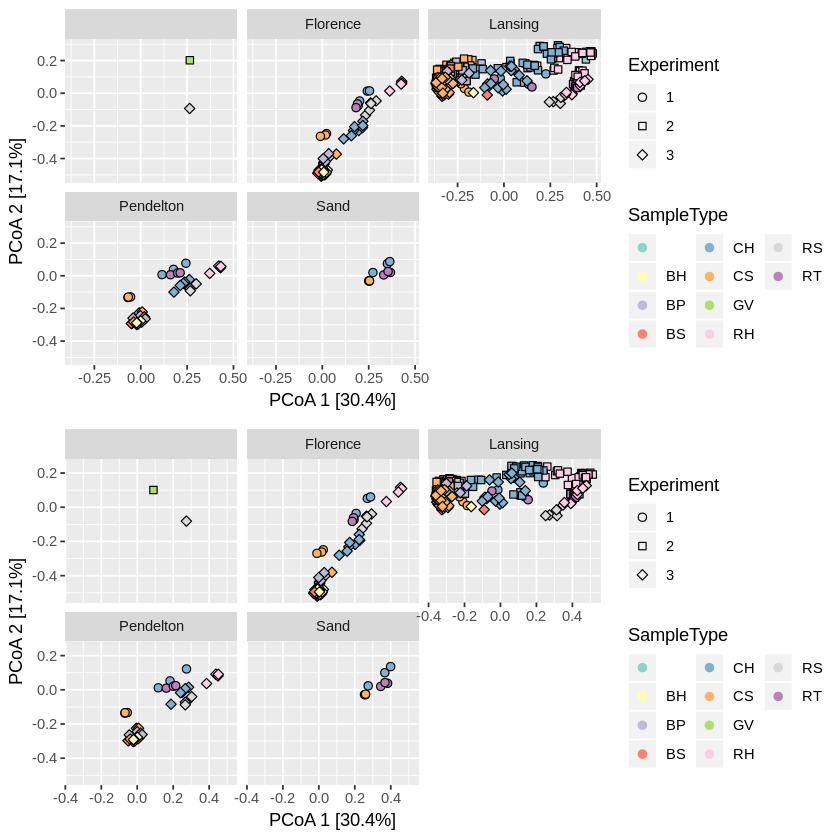

In [132]:
library(RColorBrewer)
cs = brewer.pal(10,"Set3")
p1 = ggplot(p, aes(x = Axis.1, y = Axis.2)) +
geom_point(aes(fill = SampleType, shape = as.factor(Experiment)), size = 2) +
facet_wrap(~Soil)+
#theme_pub() +

scale_shape_manual(values=c(21,22,23), guide = guide_legend(title = "Experiment", ncol = 1))+
scale_fill_manual(values = cs)+
labs(x = "PCoA 1 [30.4%]", y = "PCoA 2 [17.1%]") +

guides(fill=guide_legend(override.aes=list(colour= cs), ncol = 3)) + 
theme(legend.position="right") 

#color = "grey20",
p1

p2 = ggplot(p.sub, aes(x = Axis.1, y = Axis.2)) +
geom_point(aes(fill = SampleType, shape = as.factor(Experiment)), size = 2) +
facet_wrap(~Soil)+
#theme_pub() +

scale_shape_manual(values=c(21,22,23), guide = guide_legend(title = "Experiment", ncol = 1))+
scale_fill_manual(values = cs)+
labs(x = "PCoA 1 [30.4%]", y = "PCoA 2 [17.1%]") +

guides(fill=guide_legend(override.aes=list(colour= cs), ncol = 3)) + 
theme(legend.position="right") 

#color = "grey20",
grid.arrange(p1, p2, ncol =1)

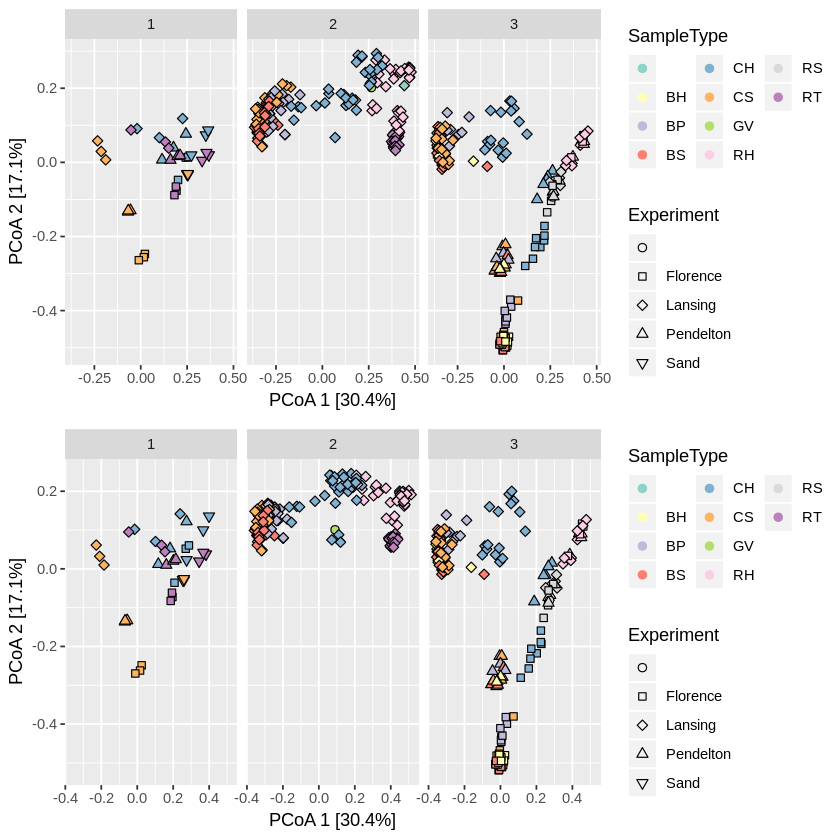

In [135]:
library(RColorBrewer)
cs = brewer.pal(10,"Set3")
p1 = ggplot(p, aes(x = Axis.1, y = Axis.2)) +
geom_point(aes(fill = SampleType, shape = as.factor(Soil)), size = 2) +
facet_wrap(~Experiment)+
#theme_pub() +

scale_shape_manual(values=c(21,22,23,24, 25), guide = guide_legend(title = "Experiment", ncol = 1))+
scale_fill_manual(values = cs)+
labs(x = "PCoA 1 [30.4%]", y = "PCoA 2 [17.1%]") +

guides(fill=guide_legend(override.aes=list(colour= cs), ncol = 3)) + 
theme(legend.position="right") 

#color = "grey20",


p2 = ggplot(p.sub, aes(x = Axis.1, y = Axis.2)) +
geom_point(aes(fill = SampleType, shape = as.factor(Soil)), size = 2) +
facet_wrap(~Experiment)+
#theme_pub() +

scale_shape_manual(values=c(21,22,23, 24, 25), guide = guide_legend(title = "Experiment", ncol = 1))+
scale_fill_manual(values = cs)+
labs(x = "PCoA 1 [30.4%]", y = "PCoA 2 [17.1%]") +

guides(fill=guide_legend(override.aes=list(colour= cs), ncol = 3)) + 
theme(legend.position="right") 

#color = "grey20",
grid.arrange(p1, p2, ncol =1)

## Closer look at exp 2

In [141]:
ps2 = ps.snorm %>% subset_samples(., Experiment == 2)
ps2.sub = ps.sub.snorm %>% subset_samples(., Experiment == 2)

ordu2 = ordinate(ps2, "PCoA", "bray")
p2 = plot_ordination(ps2, ordu2, justDF = TRUE)


ordu2.sub = ordinate(ps2.sub, "PCoA", "bray")
p2.sub = plot_ordination(ps2.sub, ordu2.sub, justDF = TRUE)

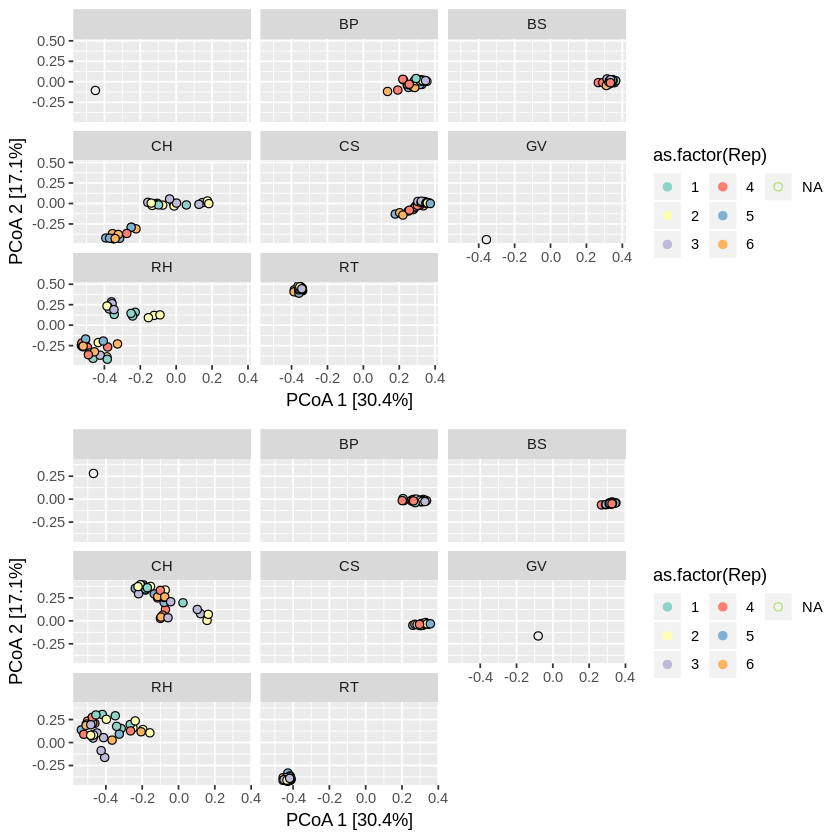

In [142]:
library(RColorBrewer)
cs = brewer.pal(7,"Set3")
p1 = ggplot(p2, aes(x = Axis.1, y = Axis.2)) +
geom_point(aes(fill = as.factor(Rep)), shape = 21, size = 2) +
facet_wrap(~SampleType)+
#theme_pub() +

#scale_shape_manual(values=c(21,22,23,24, 25), guide = guide_legend(title = "Experiment", ncol = 1))+
scale_fill_manual(values = cs)+
labs(x = "PCoA 1 [30.4%]", y = "PCoA 2 [17.1%]") +

guides(fill=guide_legend(override.aes=list(colour= cs), ncol = 3)) + 
theme(legend.position="right") 

#color = "grey20",


p2 = ggplot(p2.sub, aes(x = Axis.1, y = Axis.2)) +
geom_point(aes(fill = as.factor(Rep)), shape = 21, size = 2) +
facet_wrap(~SampleType)+
#theme_pub() +

#scale_shape_manual(values=c(21,22,23, 24, 25), guide = guide_legend(title = "Experiment", ncol = 1))+
scale_fill_manual(values = cs)+
labs(x = "PCoA 1 [30.4%]", y = "PCoA 2 [17.1%]") +

guides(fill=guide_legend(override.aes=list(colour= cs), ncol = 3)) + 
theme(legend.position="right") 

#color = "grey20",
grid.arrange(p1, p2, ncol =1)

In [151]:
ps2.sub %>% 
    subset_samples(SampleType == "GV") %>% 
    filter_taxa(., function(x) sum(x > 0) > 0, TRUE) %>% 
            psmelt() %>% 
            arrange(desc(Abundance))

Warning message in psmelt(.):
“The sample variables: 
Sample
 have been renamed to: 
sample_Sample
to avoid conflicts with special phyloseq plot attribute names.”

OTU,Sample,Abundance,sample_Sample,Experiment,Plant,Fungus,Soil,SampleType,Treatment,TimePoint,DAI,Rep,Concentration_ng.ul,Kingdom,Phylum,Class,Order,Family,Genus
ASV7,152_GvSpores,0.071095312,GvSpores,2,,Gv,,GV,,NA,NA,NA,0.101,Bacteria,Proteobacteria,Alphaproteobacteria,Rickettsiales,Mitochondria,NA
ASV2,152_GvSpores,0.041324150,GvSpores,2,,Gv,,GV,,NA,NA,NA,0.101,Bacteria,NA,NA,NA,NA,NA
ASV10,152_GvSpores,0.033548100,GvSpores,2,,Gv,,GV,,NA,NA,NA,0.101,Bacteria,Cyanobacteria,Oxyphotobacteria,Chloroplast,NA,NA
ASV34,152_GvSpores,0.016885137,GvSpores,2,,Gv,,GV,,NA,NA,NA,0.101,Bacteria,Proteobacteria,Gammaproteobacteria,Betaproteobacteriales,Burkholderiaceae,Delftia
ASV58,152_GvSpores,0.013552544,GvSpores,2,,Gv,,GV,,NA,NA,NA,0.101,Bacteria,Acidobacteria,Subgroup_6,NA,NA,NA
ASV109,152_GvSpores,0.012441680,GvSpores,2,,Gv,,GV,,NA,NA,NA,0.101,Bacteria,Verrucomicrobia,Verrucomicrobiae,Pedosphaerales,Pedosphaeraceae,NA
ASV148,152_GvSpores,0.011330815,GvSpores,2,,Gv,,GV,,NA,NA,NA,0.101,Bacteria,Proteobacteria,Gammaproteobacteria,Betaproteobacteriales,Burkholderiaceae,Ideonella
ASV77,152_GvSpores,0.010886470,GvSpores,2,,Gv,,GV,,NA,NA,NA,0.101,Bacteria,Proteobacteria,Gammaproteobacteria,Gammaproteobacteria_Incertae_Sedis,Unknown_Family,Acidibacter
ASV68,152_GvSpores,0.009997778,GvSpores,2,,Gv,,GV,,NA,NA,NA,0.101,Bacteria,Bacteroidetes,Bacteroidia,Cytophagales,Microscillaceae,NA
ASV381,152_GvSpores,0.008442568,GvSpores,2,,Gv,,GV,,NA,NA,NA,0.101,Bacteria,Verrucomicrobia,Verrucomicrobiae,Pedosphaerales,Pedosphaeraceae,ADurb.Bin063-1


# Save phyloseq objects without contaminants

In [152]:
ps.sub

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 15398 taxa and 435 samples ]
sample_data() Sample Data:       [ 435 samples by 11 sample variables ]
tax_table()   Taxonomy Table:    [ 15398 taxa by 6 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 15398 tips and 15358 internal nodes ]

In [160]:
ps.sub %>% prune_taxa(c("X90478", "ASV1000"),.)

Warning message in prune_taxa(taxa, phy_tree(x)):
“prune_taxa attempted to reduce tree to 1 or fewer tips.
 tree replaced with NULL.”

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1 taxa and 435 samples ]
sample_data() Sample Data:       [ 435 samples by 11 sample variables ]
tax_table()   Taxonomy Table:    [ 1 taxa by 6 taxonomic ranks ]

In [153]:
sample_sums(ps.sub)[1:10]

10xBLS156_S303  2xBLS143_S297  5xBLS120_S300     BaseA_S310     BaseB_S291 
         40949          19771          20990          19392          14726 
    BaseC_S294     HCBF1_S247     HCBF2_S259     HCBF3_S271     HCBN1_S211 
         19864          17655          13876          22576          22450

In [156]:
#remove mitochondria
ps.sub2 = subset_taxa(ps.sub, Family != "Mitochondria" | is.na(Family))
ps.sub2 = subset_taxa(ps.sub, Order != "Chloroplast" | is.na(Order))
ps.sub2

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 15364 taxa and 435 samples ]
sample_data() Sample Data:       [ 435 samples by 11 sample variables ]
tax_table()   Taxonomy Table:    [ 15364 taxa by 6 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 15364 tips and 15324 internal nodes ]

In [157]:
saveRDS(ps.sub2, file = '~/Hyphosphere/3exp_phyloseq_thresh_nocontam.rds')

In [158]:
sessionInfo()

R version 3.5.1 (2018-07-02)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: Ubuntu 16.04.6 LTS

Matrix products: default
BLAS/LAPACK: /data/home/be68/anaconda3/envs/MyR/lib/R/lib/libRblas.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] RColorBrewer_1.1-2 bindrcpp_0.2.2     ggplot2_3.0.0      gridExtra_2.3     
 [5] phyloseq_1.26.1    reshape2_1.4.3     dplyr_0.7.6        tidyr_0.8.1       
 [9] dada2_1.10.0       Rcpp_0.12.18      

loaded via a namespace (and not attached):
 [1] Biobase_2.42.0              splines_3.5.1           

# just a test

In [162]:
#removes Mollicute related endobacteria
physeq.Full = ps.sub
physeq.Full = subset_taxa(physeq.Full, !is.na(Phylum))
physeq.Full

#Subset experiment 1
physeq.exp1 = subset_samples(physeq.Full, Experiment == 1 & !SampleType %in% c("MK", "PB", "EB"))
physeq.exp1 = transform_sample_counts(physeq.exp1, function(x) x/sum(x))
physeq.exp1

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 15055 taxa and 435 samples ]
sample_data() Sample Data:       [ 435 samples by 11 sample variables ]
tax_table()   Taxonomy Table:    [ 15055 taxa by 6 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 15055 tips and 15015 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 15055 taxa and 36 samples ]
sample_data() Sample Data:       [ 36 samples by 11 sample variables ]
tax_table()   Taxonomy Table:    [ 15055 taxa by 6 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 15055 tips and 15015 internal nodes ]

In [167]:
tmp = physeq.exp1 %>% filter_taxa(., function(x) sum(x > 0) > 0, TRUE)
                                  tmp
twunif.dist = phyloseq::distance(tmp, 
                      method = "unifrac", 
                      weighted = TRUE,
                      fast = TRUE, 
                      parallel = FALSE, 
                      normalized = FALSE)

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 4572 taxa and 36 samples ]
sample_data() Sample Data:       [ 36 samples by 11 sample variables ]
tax_table()   Taxonomy Table:    [ 4572 taxa by 6 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 4572 tips and 4568 internal nodes ]

Warning message in matrix(tree$edge[order(tree$edge[, 1]), ][, 2], byrow = TRUE, :
“data length [9139] is not a sub-multiple or multiple of the number of rows [4570]”

In [169]:
ape::is.rooted(phy_tree(tmp))

[1] TRUE

In [170]:
root.by.outgroup <- function(tree.unrooted) {
  longest.edge <- which.max(tree.unrooted$edge.length)
  long.nodes <- tree.unrooted$edge[longest.edge,]     #this should usually include one tip
  new.outgroup <- long.nodes[long.nodes < Ntip(tree.unrooted)]
  tree.rooted <- root(tree.unrooted, outgroup=new.outgroup, resolve.root=T)
  tree.rooted
}

In [174]:
require(ape)
new_tree = root.by.outgroup(phy_tree(tmp))
phy_tree(tmp) = new_tree

In [175]:
twunif.dist = phyloseq::distance(tmp, 
                      method = "unifrac", 
                      weighted = TRUE,
                      fast = TRUE, 
                      parallel = FALSE, 
                      normalized = FALSE)

Warning message in matrix(tree$edge[order(tree$edge[, 1]), ][, 2], byrow = TRUE, :
“data length [9139] is not a sub-multiple or multiple of the number of rows [4570]”